In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing data
data = pd.read_csv('data .csv')


In [4]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [6]:
del data['Unnamed: 32']

In [7]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [8]:
X = data.iloc[:, 2:].values
y = data.iloc[:, 1].values

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
# Initialising the ANN
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(26, activation='relu', input_dim=30))
# Adding dropout to prevent overfitting
classifier.add(Dropout(0.1))
# Adding the second hidden layer
classifier.add(Dense(13,  activation='relu'))
# Adding dropout to prevent overfitting
classifier.add(Dropout(0.1))
classifier.add(Dense(6, activation='relu'))
# Adding dropout to prevent overfitting
classifier.add(Dropout(0.1))
classifier.add(Dense(1,  activation='sigmoid'))
# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size=100, nb_epoch=150,shuffle=True)
# Long scroll ahead but worth
# The batch size and number of epochs have been set using trial and error. Still looking for more efficient ways. Open to suggestions. 

W0513 23:39:46.788244  8280 training.py:686] The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/150
512/512 [==============================] - 0s 736us/sample - loss: 0.6660 - accuracy: 0.5488
Epoch 2/150
512/512 [==============================] - 0s 49us/sample - loss: 0.5791 - accuracy: 0.6875
Epoch 3/150
512/512 [==============================] - 0s 56us/sample - loss: 0.5253 - accuracy: 0.7656
Epoch 4/150
512/512 [==============================] - 0s 58us/sample - loss: 0.4625 - accuracy: 0.8379
Epoch 5/150
512/512 [==============================] - 0s 56us/sample - loss: 0.4137 - accuracy: 0.8633
Epoch 6/150
512/512 [==============================] - 0s 50us/sample - loss: 0.3783 - accuracy: 0.8867
Epoch 7/150
512/512 [==============================] - 0s 43us/sample - loss: 0.3345 - accuracy: 0.8906
Epoch 8/150
512/512 [==============================] - 0s 58us/sample - loss: 0.3072 - accuracy: 0.8984
Epoch 9/150
512/512 [==============================] - 0s 53us/sample - loss: 0.2708 - accuracy: 0.9160
Epoch 10/150
512/512 [==============================] - 0s 51us

512/512 [==============================] - 0s 51us/sample - loss: 0.0580 - accuracy: 0.9902
Epoch 79/150
512/512 [==============================] - 0s 46us/sample - loss: 0.0764 - accuracy: 0.9883
Epoch 80/150
512/512 [==============================] - 0s 35us/sample - loss: 0.0757 - accuracy: 0.9902
Epoch 81/150
512/512 [==============================] - 0s 41us/sample - loss: 0.0678 - accuracy: 0.9883
Epoch 82/150
512/512 [==============================] - 0s 36us/sample - loss: 0.0719 - accuracy: 0.9902
Epoch 83/150
512/512 [==============================] - 0s 43us/sample - loss: 0.0798 - accuracy: 0.9902
Epoch 84/150
512/512 [==============================] - 0s 41us/sample - loss: 0.0776 - accuracy: 0.9883
Epoch 85/150
512/512 [==============================] - 0s 47us/sample - loss: 0.0825 - accuracy: 0.9883
Epoch 86/150
512/512 [==============================] - 0s 45us/sample - loss: 0.0776 - accuracy: 0.9902
Epoch 87/150
512/512 [==============================] - 0s 43us/samp

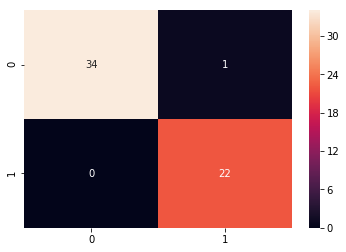

In [21]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
plt.savefig('h.png')

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.96      1.00      0.98        22

   micro avg       0.98      0.98      0.98        57
   macro avg       0.98      0.99      0.98        57
weighted avg       0.98      0.98      0.98        57



In [23]:
print("Our accuracy is {}%".format(((cm[0][0] + cm[1][1])/57)*100))

Our accuracy is 98.24561403508771%
